<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework2_part2_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2.2 (20 points)

**Learning objectives:**

In this assignment, we will:

* Continue to exercise our skills in more advanced python features (functions, list comprehensions)
* Fit models to data with regularized least squares regression
* Perform cross-validation to find the best predictive model
* Analyze how cross-validation performance changes with model complexity, and how model complexity can be controlled by regularization

---
Load the same libraries that we used in *Assignment 2.1*.

*   `numpy` (as `np`)
*   `matplotlib.pyplot` (as `plt`)

Now is also a good time to set the default font size to 16.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

---
## Part 1 (1 points)
Regenerate our `sin` data from assisgnemtn 2.1:

* use [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace), to generate a set of 12 time indices and call it `x`. For simplicity have those indices range from 0 to 1 - $\frac{1}{12}$ (subtract the $\frac{1}{12}$ so the indices don't loop back onto themself.

* Use `np.sin` to create a set of 12 temperature measurements called `y`. Be sure to set the frequency to a period of 1 year.

* For plotting purposes, we want to sample time more densely. So create another time index array (call it `xplot`). Use np.arange to create a time index vector from 0 to 1 in steps of 0.01.

* Use `np.random.seed` and set the `seed=3`. This is so we all have the same random data.

* Add independent Gaussian noise with `std=0.25` to `y`. Call this noisy version of the `sin` function `t`. NOTE THE LARGER STD.

* Plot xplot vs np.sin(xplot) (with appropriate frequency). It should look like you expect :)

* Label the xlabel with month, the ylabel with Temperature. Use plt.xticks to re-label the xticks with the months starting from April and also rotate the labels so you can read them.

* Plot `t` alongside our `sin` function (at the `xplot` spacing)

**Your plot should look like this:**

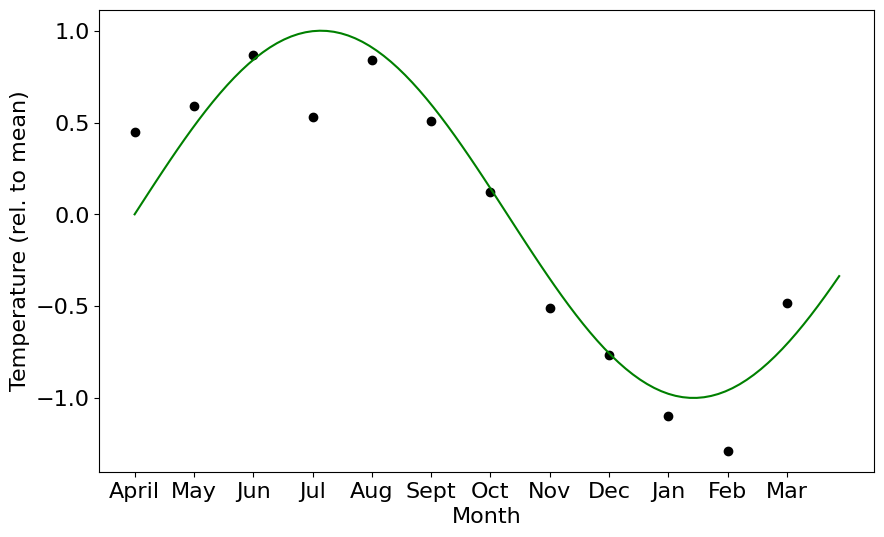

<Figure size 640x480 with 0 Axes>

In [5]:
x=np.linspace(0,1-1/12,12)
y=np.sin(x*6)
np.random.seed(3)
t=np.random.normal(y,scale=0.25)
plt.figure(figsize=(10,6))
xplot =np.arange(0,1,0.01)
yplot=np.sin(xplot*6)
plt.plot(xplot,yplot,'g')
plt.scatter(x,t,color='black')
plt.xlabel('Month')
plt.ylabel('Temperature (rel. to mean)')
label=('April','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec','Jan','Feb','Mar')
plt.xticks(x,label)
plt.show()
plt.tight_layout()

---
## Part 2 (2 points)

Regenerate several of our helpful functions from assignment 2.1.

*  Write a function that takes `x` and `n` as an input and returns all polynomials up to order `n-1` of each entry of `x`.

* Write a function that takes `x` and `b` as an input and returns the [dot product](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) of `b` with a matrix of all `x` values raised to polynomials of order $n - 1$. This function should use the function you defined previously for computing polynomial powers of `x`. The output should be of dimension 12 (for all 12 datapoints).

* Write a function that computes the squared difference between the $bX$ and our data $t$ (i.e., our objective function). This function should call the function you wrote previously for computing the dot product $bX$.

* Write a function that computes the analytic solution for ordinary least squares. [`numpy.linalg`](https://numpy.org/doc/stable/reference/routines.linalg.html) is your friend; be sure to import is as `import numpy.linalg as linalg`.




---
## Part 3 (1 points)

To perform cross-validation we need data for training the model, and then **new** data to test the model. Generate a new dataset called `ttest` by adding new random noise to `y`. Use `seed=4`.


---
## Part 4 (4 points)

In assignment 2.1, we began to see the signs of overfitting: overly complex models will fit the training data **too** well. Let's explore this more quantitatively.

* Using a list comprehension and your function for the analytic least squares solution, compute the set of coefficients (i.e., `b`) that minimizes our objective function over a range of models that use polynomials ranging from only the 0-th order polynomial, to a model that includes up to the 9-th order polynomial of `x`.

* Using a list comprehension and your function for the value of the objective function, compute the model error over the training data, for all your models.

* Using a list comprehension and your function for the value of the objective function, compute the model error over the **test** data, for all your models.

* Plot the training (in red) and test (in blue) error as a function of model complexity. Labels the axes and include a legend.

<font color='red'>**SHORT ANSWER:** What do you notice about the falloff in error for the training data, and for the testing data, respectively?

**Your plot should look like this:**



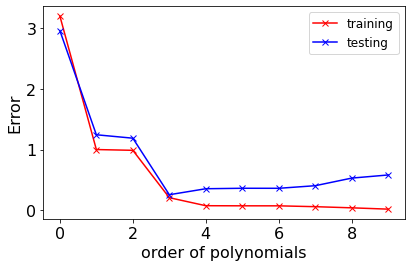

---
## Part 5 (2 points)

Let's take a look at the different models we fit, depending on the error of the model.

* Use two subplots.

* In the left subplot, plot the training data (with black dots) and the model that minimizes the training error (in red) and the testing error (in cyan).

* In the right subplot, plot the test data (with blue x's) and the model that minimizes the training error (in red) and the testing error (in cyan).

* Labels the axes and include a legend.

<font color='red'>**SHORT ANSWER:** What do you notice about the different model fits when comparing them against the training data and the testing data, respectively?

**Your plot should look like this:**

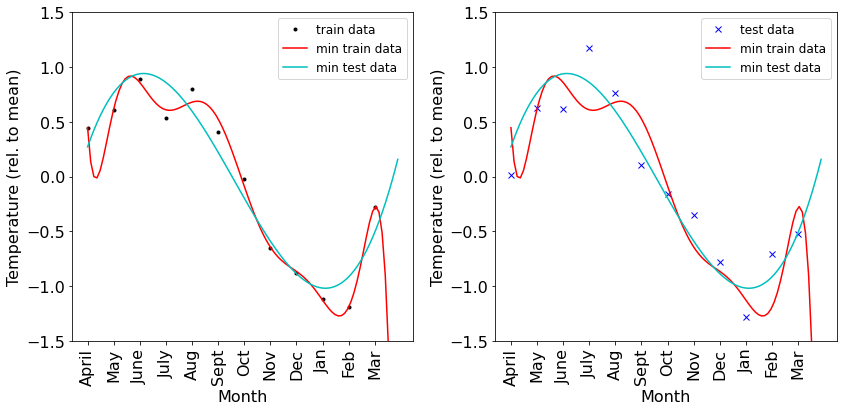

---
## Part 6 (2 points)

Above, we have shown that testing error will increase if our model is too complex. This means that we are not doing as good a job predicting new data as we could with a simpler model. In lecture, we discussed how regularization can maintain model simplicity while still predicting the data.

Recall that the regularized least sqaures objective function is: $$J = \frac{1}{2}||t - bX||^2 + \frac{\lambda}{2}||b||^2,$$ where $\lambda$ is a parameter that controls how strong the regularizing term is.

In class, we analyticaly computed the value of $b$ that minimizes this objective function. Write a python function that computes $b$.



---
## Part 7 (4 points)

Recall from lecture that in order to pick the value of $\lambda$ that finds the simplest model, we have to scan over values of $\lambda$ and find the one that minimzes the test error.

* Using a list comprehension and your function for the **regularized** analytic least squares solution, compute the set of coffeficients (i.e., `b`) that minimizes our objective function over a range of models that use values of $\lambda$ that range from $10^{-14}$ to $10^{13}$.

* Using a list comprehension and your function for the value of the objective function, compute the model error over the training data, for all models with different values of $\lambda$.

* Using a list comprehension and your function for the value of the objective function, compute the model error over the **test** data, for all models with different values of $\lambda$.

* Plot the training (in red) and test (in blue) error as a function of $log_{10}(\lambda)$. Labels the axes and include a legend.

<font color='red'>**SHORT ANSWER:** What do you notice about the falloff in error for the training data, and for the testing data, respectively?

**Your plot should look like this:**


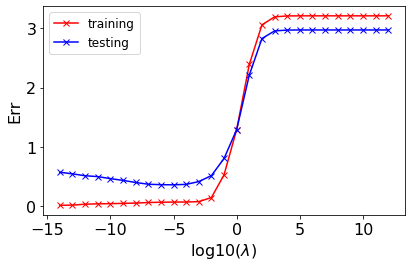

---
## Part 8 (2 points)

Let's take a look at the different models we fit, depending on the error of the model.

* Use two subplots.

* In the left subplot, plot the training data (with black dots), the model that minimizes the training error (in red), the model that minimizes the testing error (in cyan), and the model with the largest value of $\lambda$ (i.e, in the most regularized model; in green).

* In the right subplot, plot the test data (with blue x's) and the model that minimizes the training error (in red), the model that minimizes the testing error (in cyan), and the model with the largest value of $\lambda$ (i.e, in the most regularized model; in green).

* Labels the axes and include a legend.

<font color='red'>**SHORT ANSWER:** What do you notice about the models fits for the training data and the testing data, respectively? What do you notice about the most regularized model?

**Your plot should look like this:**

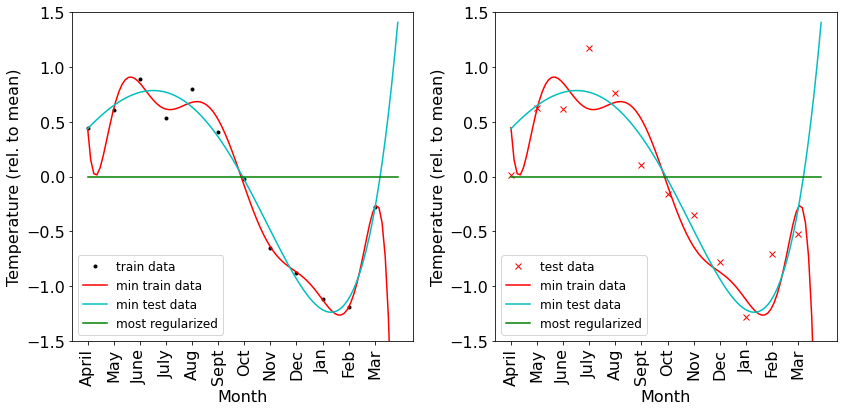

---
## Part 9 (2 points)

What is regularization doing? One way to see this is to examine the coefficients of $b$ for each model.

* Plot the $b$ weight values (polynomial order on the x-axis, log-scaled value on the y axis) for the following 3 models: the model that minimizes the training error (in red), the model that minimizes the test error (in cyan), and the model with the largest value of $\lambda$ (i.e, in the most regularized model; in green).

* Labels the axes and include a legend.

<font color='red'>**SHORT ANSWER:** What do you notice about the model that best fits the training data? What about the one that best fits the testing data? What do you notice about the most regularized model?

**Your plot should look like this:**

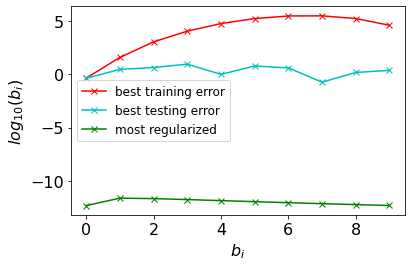